

<img src="../images/cads-logo.png" style="height: 100px;" align=left> <img src="../images/statsmodels-logo.jpg" style="height: 100px;" align=right>


# Regression Modelling & Model Evaluation

## Table of Content

- [Introduction to linear regression](#Introduction-to-linear-regression)
- [The prediction problem](#The-prediction-problem)
- [Regression as Curve-fitting](#Regression-as-Curve-fitting)
- [Simple linear regression](#Simple-linear-regression)
    - [Beware of extrapolation!](#Beware-of-extrapolation!)
    - [Minimize ‘least squares’](#Minimize-‘least-squares’)
    - [Regression line passes through $\bar x$ and $\bar y$](#Regression-line-passes-through-$\bar-x$-and-$\bar-y$)
- [Multiple linear regression](#Multiple-linear-regression)
- [Model Specification: Functional Forms](#Model-Specification:-Functional-Forms)
    - [Linear regression](#Linear-regression)
    - [Polynomial terms](#Polynomial-terms)
        - [Overfitting and higher order polynomial terms](#Overfitting-and-higher-order-polynomial-terms)
        - [Other causes of overfitting](#Other-causes-of-overfitting)
    - [Interaction terms](#Interaction-terms)
        - [Interpreting polynomial transformations](#Interpreting-polynomial-transformations)
        - [Interpreting interaction terms](#Interpreting-interaction-terms)
- [Categorical predictors](#Categorical-predictors)
    - [Dummy variables and the intercept](#Dummy-variables-and-the-intercept)
    - [Interaction terms with dummies: Numerical * Categorical](#Interaction-terms-with-dummies:-Numerical-*-Categorical)
    - [Interaction terms with dummies: Categorical * Categorical](#Interaction-terms-with-dummies:-Categorical-*-Categorical)
- [Perfect vs. imperfect collinearity](#Perfect-vs.-imperfect-collinearity)
- [Reference](#Reference)

In this notebook we use statsmodel which is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 
To install this package you can run the following lines of code.

In [ ]:
#!pip install --upgrade pip
#!pip3 uninstall statsmodels -y
# !pip3 install scipy==1.2  --user
# !pip3 install statsmodels==0.10.0rc2 --pre --user

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 

In [3]:
# `sm.datasets.get_rdataset` downloads and returns R datasets
iris = sm.datasets.get_rdataset("iris").data
mtcars = sm.datasets.get_rdataset("mtcars").data
ToothGrowth = sm.datasets.get_rdataset("ToothGrowth").data
anscombe = sns.load_dataset("anscombe")

# Introduction to linear regression

## The prediction problem 
> "Essentially, all models are wrong, but some are useful." <br>
> Box, George E. P.; Norman R. Draper (1987)

Let's suppose we have some data on insurance policyholders. Based on the characteristics of insurance policyholders, we want to predict their insurance claims. 

Let's denote the characteristics of insurance policyholders as $x$, and their insurance claims as $y$. Explanatory variables, also known as independent variables or **features**, are typically denoted $x$ (multiple features are denoted with a capital $X$); and the dependent variable, also known as the **response**, is typically denoted $y$. 

<img src='../images/Xy.png' align=center>

Say you have data on $X$ and $y$. You want to predict, for new sets of data, what $y$ will be in the presence of $X$. You could try to map a function of policyholder characteristics $X$ onto the response $y$: 

$$y = f(X) + \epsilon$$

**Prediction** is concerned with estimating the function $\hat f()$ which maps the predictors $X$ to a response $y$. For a given $X$, we show the value of this estimate as $\hat y$.

$$\hat y = \hat f(X)$$

To make a good prediction model, we should fit a function $\hat f()$ that minimises the error $y - \hat y$. 

## Course Goals <a name='goal'></a>
>1.	Understand and conduct linear regression in Python
>2.	Understand linear regression results and evaluation metrics
>3.	Evaluate a linear regression model and select the best 

### Course Scope and Layout <a name='scope'></a>
>**Day 1**: We will explore the idea of regression modelling and its Python implementation. <br>
>**Day 2**: We will discuss the methods to evaluate regression models.

## Regression as Curve-fitting

We will start with the a variable case, also known as **bivariate regression**. 

**Example:**

Assume you want to predict the fuel efficiency (`mpg`) of a car based on its displacement in `mtcars` dataset.

A data frame with 32 observations on 11 (numeric) variables.

[, 1]	mpg	Miles/(US) gallon

[, 2]	cyl	Number of cylinders

[, 3]	disp	Displacement (cu.in.)

[, 4]	hp	Gross horsepower

[, 5]	drat	Rear axle ratio

[, 6]	wt	Weight (1000 lbs)

[, 7]	qsec	1/4 mile time

[, 8]	vs	Engine (0 = V-shaped, 1 = straight)

[, 9]	am	Transmission (0 = automatic, 1 = manual)

[,10]	gear	Number of forward gears

[,11]	carb	Number of carburetors

In [4]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We plot the data, and find that the relationship between the variables is roughly linear: 

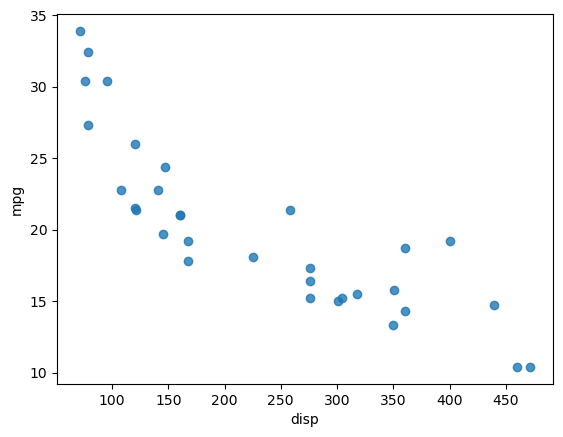

In [5]:
sns.regplot(x = "disp", y = "mpg", 
            data = mtcars, 
            ci = None, 
            fit_reg = False);

It seems as though the two variables are linearly related! 

**How can we predict the fuel efficiency of a car based on its `disp`?**

One way is to: 

1. **Fit** a linear line through the points. 
2. The value of $y$ on the fitted line for the value of $x$ you wish to predict is your **prediction**, $\hat y$

<img src='../images/mpg_disp.png' align='centre' width=500>

An example of this procedure is as follows: 

In [6]:
reg = smf.ols(formula = 'mpg ~ disp', data = mtcars)
car_mod1 = reg.fit()

In [7]:
car_mod1.predict(exog=dict(disp=200))

0    21.356831
dtype: float64

**Attention**

Instead of creating and fitting a regression model using `smf.ols` and `.fit()` we can define the function `lm` that receives the formula and the data of the model and returns a fitted model as below:

In [8]:
def lm(formula, data): 
    """
    Specifies and fits linear model with statsmodels
    """
    reg = smf.ols(formula = formula, data = data)
    return reg.fit()

In [9]:
car_mod1 = lm(formula = "mpg ~ disp", 
         data = mtcars)
car_mod1.predict(exog=dict(disp=200))

0    21.356831
dtype: float64

(0.0, 35.0)

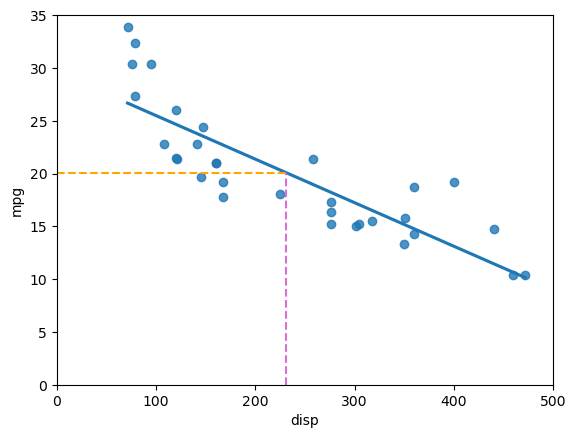

In [10]:
# Create the scatter plot of data + regression line
sns.regplot(x = "disp", y = "mpg", 
            data = mtcars, 
            ci = None)

# Create horizontal dashed line y=mtcars.mpg.mean() up to xmax = mtcars.disp.mean()/500
plt.axhline(y = mtcars.mpg.mean(), 
            xmax = mtcars.disp.mean()/500, 
            linestyle = "dashed", color='orange')

# Create vertical dashed line x=mtcars.disp.mean() up to ymax=mtcars.mpg.mean()/35
plt.axvline(x = mtcars.disp.mean(), 
            ymax = mtcars.mpg.mean()/35, 
            linestyle = "dashed", color='orchid')

plt.xlim(0, 500)
plt.ylim(0, 35)

# Simple linear regression

A straight line is denoted by the equation $$y = \beta_0 + \beta_1 x$$

You may know $\beta_0$ as the intercept, and $\beta_1$ as the slope or gradient. 

What is the **intercept**? It is simply the value of $y$ when $x = 0$, or the value of y which intercepts the y-axis. 

What is the **slope**? It is the predicted change in $y$ for a unit change in $x$. 
<img src="../images/slope_intercept.png"  align=center>

The regression problem is as follows: 
>We assume that **in the population**, there is a relationship between $x$ and $y$:
$$y = \beta _0  + \beta_1 x + \epsilon$$
we only have a sample of data, but we want to estimate $\beta_0$ and $\beta_1$ in the population where:
- $\beta = [\beta _0, \beta_1]$ refers to the coefficients, or the **weights** of the model. $\beta_0$ is the **intercept**, and $\beta _1$ is the **slope**
. 
- $\epsilon$ is the **error term**, referring to the discrepancy between the actual value of the outcome $y$ and the value of $\beta _0  + \beta_1 x$. 

We add the **hat operator** to denote estimated values in the **sample data**: 

$$\hat y = \hat \beta _0  + \hat \beta_1 x $$

- $\hat{\beta_0}$ is the estimate of $\beta_0$, and can be interpreted as the value of $\hat y$ given $x = 0$.
- $\hat{\beta_1}$ is the estimate of $\beta_1$, can be interpreted as the increase in $\hat y$ for a unit increase in $x$. 

<img src="../images/LR.png"  align=center>

To access the coefficients $\hat{\beta_0}$ (intercept), and $\hat{\beta_1}$ (slope), we can use `model.params` as below:

In [11]:
car_mod1.params

Intercept    29.599855
disp         -0.041215
dtype: float64

As you have seen for `disp` = 200, our model predicted `mpg` = 21.356831. We can check if this value equals $\hat y = \hat \beta _0  + \hat \beta_1 x $:

In [12]:
disp = 200
y_pred = car_mod1.predict(exog=dict(disp=200))
beta_0 = car_mod1.params.Intercept
beta_1 = car_mod1.params.disp
y_hat = beta_0 + beta_1 * disp
y_hat, y_pred[0]

(21.356830763606737, 21.356830763606737)

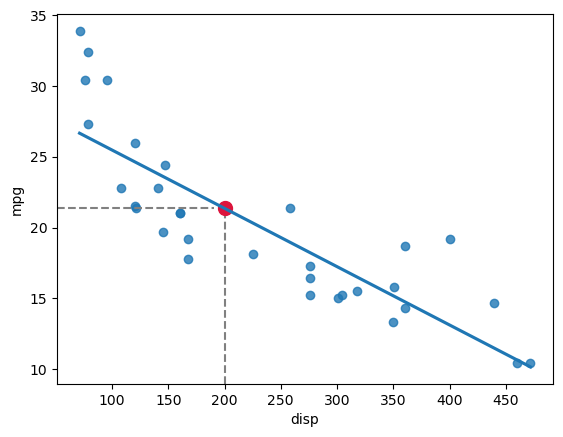

In [13]:
sns.regplot(x = "disp", y = "mpg", 
            data = mtcars, 
            ci = None)

plt.scatter(x=200, y=y_hat, s=100, color = 'crimson')

plt.axvline(x = 200, ymax=y_hat/47,
            linestyle = "dashed", color='gray')

plt.axhline(y = y_hat, xmax=200/630,
            linestyle = "dashed", color='gray');

`model.summary()` returns a comprehensive report of the model details that we will discuss it later in this course.

In [14]:
car_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.38e-10
Time:                        09:56:48   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Example

1. For the above regression, what is the predicted change in `mpg` for a unit change in `disp`? 

<img src="../images/change.png"  align=center, width=600, height=600>

In [15]:
# You can have access to the coefficients using the following code:
car_mod1.params

Intercept    29.599855
disp         -0.041215
dtype: float64

In [16]:
f"{car_mod1.params.disp} change in mpg for a unit increase in disp"

'-0.04121511996278613 change in mpg for a unit increase in disp'

## Beware of extrapolation! 

Applying our model to data outside the range of the data we've fitted our model on, is known as **extrapolation**. Consider the following illustration: 

> When those blizzards hit the East Coast this winter, it proved to my satisfaction that global warming was a fraud.  That snow was freezing cold.  But in an alarming trend, temperatures this spring have risen.  
Consider this:  On February 6th it was 10 degrees.  Today it hit almost 80.  At this rate, by August it will be 220 degrees.  So clearly folks the climate debate rages on.
> 
> Stephen Colbert, April 6th, 2010
> 
> source: [OpenIntro Statistics](https://www.openintro.org/download.php?file=os2_01&referrer=/stat/down/oiStat2_01.pdf)

<img src="../images/extrapolate.png"  align=center, width=400, height=400>

To see the dangers of extrapolation, consider what our model will predict for a car with displacement of 800 units. 

**Exercise:**

What will our model predict for a car with displacement of 800 units? Is the result acceptable? Why? What is the minimum of `disp` in `mtcars` dataset? What is the maximum of `disp` in this dataset?

In [20]:
# Your code here

In [30]:
disp = 800
y_pred = car_mod1.predict(exog=dict(disp=200))
beta_0 = car_mod1.params.Intercept
beta_1 = car_mod1.params.disp
y_hat = beta_0 + beta_1 * disp
y_hat, y_pred[0]

# the result is a negative number, it extrapolates the data is not a good idea
# the maximum disp in the data is just 472, not enough data to predict a 800 displacement data

(-3.3722412140649425, 21.356830763606737)

In [32]:
# verification
# car_mod1.params
(-0.041215) * 800 + 29.599855

-3.3721449999999997

In [26]:
print(min(mtcars['disp']))
print(max(mtcars['disp']))

71.1
472.0


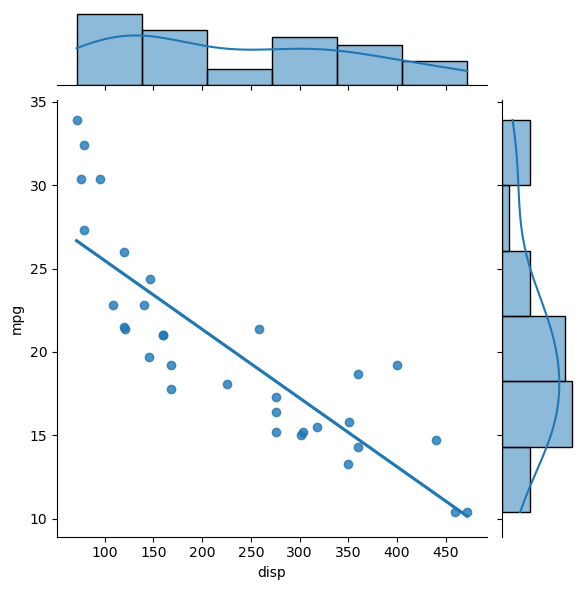

In [33]:
sns.jointplot(x = "disp", y = "mpg", 
              data = mtcars, 
              kind = "reg", 
              ci = False);

### Minimize ‘least squares’

The model we use, **Ordinary Least Squares (OLS)**, minimises the sum of squared mistakes (errors):

$$\sum^n _{i=1} (y_i - \hat y)^2 = \sum^n _{i=1} [y_i - ( \hat {\beta_0} +  \hat {\beta_1} x_i)]^2 $$

We refer to this function as the **loss function**, i.e. what we intend to **minimise**. 

<img src='../images/least_squares.png' width=500>

**Why do we square the errors?** Consider what happens if we minimise the sum of mistakes, i.e. 
$$\sum^{N-1} _{i=0} (y_i - \hat y) = \sum^{N-1} _{i=0} [y_i - ( \hat\beta_0 +  \hat\beta_1 x_i)] $$

- You would under-predict as much as possible to minimise this function, to make it as negative as possible. 
- Minimising the sum of squared mistakes allows us to treat underpredictions and overpredictions similarly. Otherwise, overpredictions will offset underpredictions.

You can solve this objective function with [calculus](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf) to find the following: 

$$\hat\beta_1 = \frac{{\mathrm{Cov}}(x, y)}{{\mathrm{Var}}(x)} = \frac{\sum_{i=0}^{N-1}{(x_i - \bar{x})\times (y_i - \bar{y})}}{\sum_{i=0}^{N-1}{(x_i - \bar{x})^2}}$$

$$\hat\beta_0 = \bar{y} - \hat\beta_1  \bar{x}$$

where $\bar y$ and $\bar x$ denote the means of $y$ and $x$ respectively, and $N$ is the size of the data. 

**This demonstrates the property that the regression line must pass through the mean of $x$ and $y$.**

<img src='../images/cov.png' align='centre' width=600>

Explore OLS further at [Seeing Theory](https://seeing-theory.brown.edu/regression-analysis/index.html#section1), [setosa.io](http://setosa.io/ev/ordinary-least-squares-regression/) and [Reddit](https://www.reddit.com/r/dataisbeautiful/comments/axl1jm/oc_ordinary_least_squares_ols_finding_the_line/).


In [34]:
beta1_hat = mtcars.mpg.cov(mtcars.disp) / mtcars.disp.var()
beta0_hat = mtcars.mpg.mean() - beta1_hat * mtcars.disp.mean()
beta1_hat, beta0_hat

(-0.041215119962786144, 29.59985475616395)

### Regression line passes through $\bar x$ and $\bar y$

We show, graphically, that 
$$\bar y =  \hat\beta_0 + \hat\beta_1 \bar x$$


In [35]:
mtcars.mpg.mean(), mtcars.disp.mean()

(20.090625000000003, 230.72187499999998)

(0.0, 35.0)

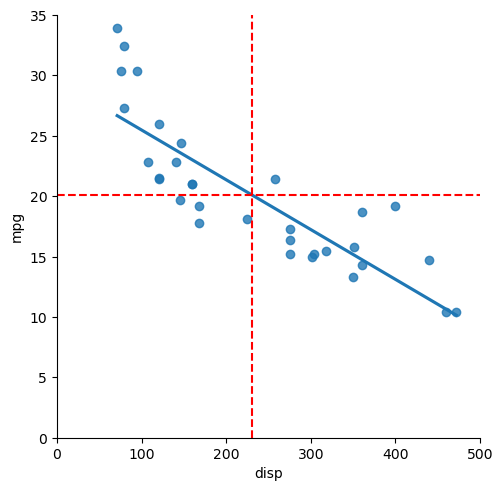

In [36]:
sns.lmplot(x = "disp", y = "mpg", 
           data = mtcars, 
           ci = False)

plt.axhline(y = mtcars.mpg.mean(), 
             c = 'r',
            linestyle = "dashed")
plt.axvline(x = mtcars.disp.mean(), 
             c = 'r', 
            linestyle = "dashed")

plt.xlim(0, 500)
plt.ylim(0, 35)

## Multiple linear regression


The principles we have learned for bivariate linear regression extend naturally to **multiple linear regression** - regression with more than one predictor. Do not confuse this with **multivariable** linear regression, which is a regression where we have more than one response variable. 

Why are we concerned with multiple linear regression? 
- Having more predictors allows us to create models with better fit and predictive power
- We can model non-linearities and interaction effects 

## Naming conventions

We typically refer to the $k^{th}$ predictor as $x_k$. When there are more than one predictors, we refer to the predictors collectively as $X$. A predictor can also be referred to as an **explanatory variable**, covariate or **independent variable**. 

The outcome of interest is represented using the letter $y$. It is also referred to as the **dependent variable**. 

$y$ is typically used to refer to actual data, whereas $\hat y$ refers to an estimate of $y$. 

In this case the formula of the multiple linear regression can be written as:

$$y = \beta _0  + \beta_1 x_1 +  \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$


where:

- $\beta = [\beta _0, \beta_1, \beta_2, ..., \beta_n]$ refers to the coefficients, or the **weights** of the model in the population. 
. 
- $\epsilon$ is the **error term**, referring to the discrepancy between the actual value of the outcome $y$ and $\beta _0  + \beta_1 x_1 +  \beta_2 x_2 + ... + \beta_n x_n$. 

We add the **hat operator** to denote an estimated value: 

$$\hat y = \hat \beta _0  + \hat \beta_1 x_1 + \hat \beta_2 x_2 + ... +\hat \beta_n x_n $$

**Example:**

Estimate `mpg` based on the two predictors displacement (`disp`) and weight (`wt`).

**Hint:** To specify multiple predictors, use the `+` sign.

In [37]:
car_mod2 = lm(formula = "mpg ~ disp + wt", 
         data = mtcars)
car_mod2.params

Intercept    34.960554
disp         -0.017725
wt           -3.350825
dtype: float64

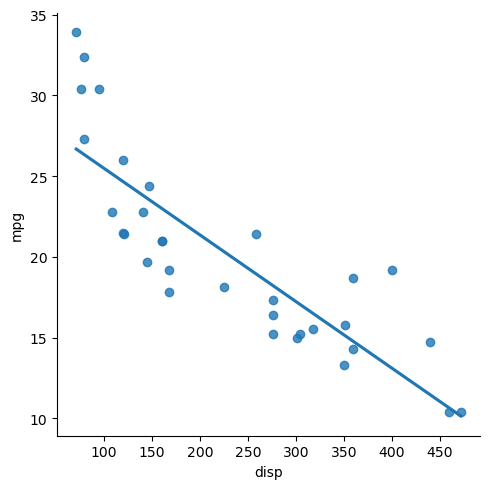

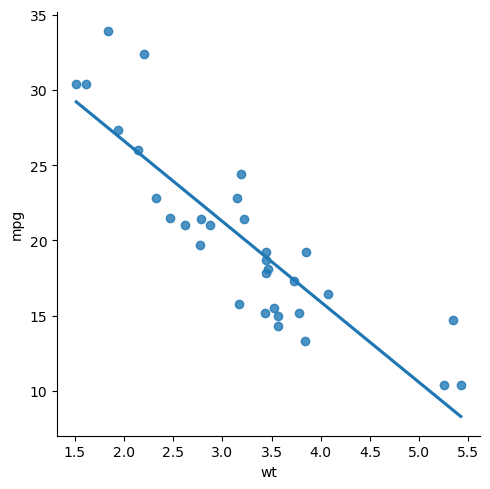

In [38]:
sns.lmplot(x = "disp", y = "mpg", 
           data = mtcars, 
           ci = False)
sns.lmplot(x = "wt", y = "mpg", 
           data = mtcars, 
           ci = False);

Equation: y = 34.96 + -0.02 x disp + -3.35 x wt


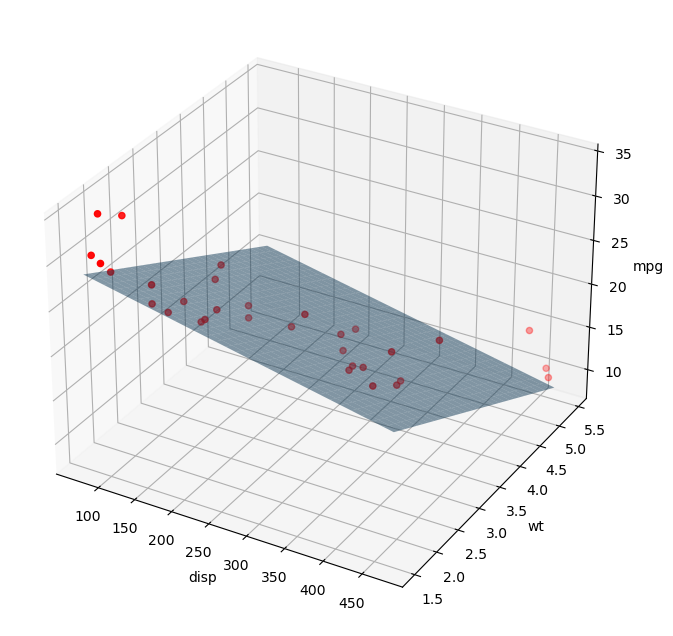

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# create arrays for the data points
X = mtcars[['disp', 'wt']]
Y = mtcars['mpg']


# graph the data
fig = plt.figure(1, figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], Y, color = 'red')
ax.set_xlabel('disp')
ax.set_ylabel('wt')
ax.set_zlabel('mpg')

# Use Linear Algebra to solve

coefs = car_mod2.params
xs = np.tile(np.linspace(min(X.iloc[:, 0]), max(X.iloc[:, 0]),61), (61,1))
ys = np.tile(np.linspace(min(X.iloc[:, 1]), max(X.iloc[:, 1]),61), (61,1)).T
zs = xs*coefs.disp+ys*coefs.wt+coefs.Intercept
print("Equation: y = {:.2f} + {:.2f} x disp + {:.2f} x wt".format(coefs.Intercept, 
                                                                  coefs.disp,
                                                          coefs.wt))
ax.plot_surface(xs,ys,zs, alpha=0.5)

plt.show()

How do we interpret the coefficients of this model? 

<img src='../images/change2.png' align=left, width=600>

These coefficients represent the change in the predicted $y$ from an additional unit of $x_k$, holding **all other predictors constant**. The coefficient of `disp` tells us the change in `mpg` due to a unit change in `disp`, **holding the value of `wt` constant**.

In [40]:
print("Holding `wt` constant, for each additional unit of `disp`, mpg is predicted to change {} ".format(car_mod2.params.disp))

Holding `wt` constant, for each additional unit of `disp`, mpg is predicted to change -0.017724744272828295 


**Exercise:**

- Predict `mpg` based on the `hp`, `disp`, and `wt`.
- Interpret the coefficients.
- Predict `mpg` for the first car information in `mtcars` and calculate error for this prediction.

In [ ]:
# Your code here

In [42]:
car_mod2.params

Intercept    34.960554
disp         -0.017725
wt           -3.350825
dtype: float64

In [46]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [47]:
disp = 160
y_pred = car_mod2.predict(exog=dict(disp=160, wt=2.62))
beta_0 = car_mod2.params.Intercept
beta_1 = car_mod2.params.disp
beta_2 = car_mod2.params.wt
y_hat = beta_0 + beta_1 + beta_2
y_hat, y_pred[0]

(31.59200395861617, 23.34543257921221)

# Model Specification: Functional Forms

## Linear regression

With linear regression, we assume that $x$ and $y$ are linearly related. If $x$ and $y$ are not linearly related, there is potential to improve our predictions. 

Consider the following examples of nonlinearity: 

In [48]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


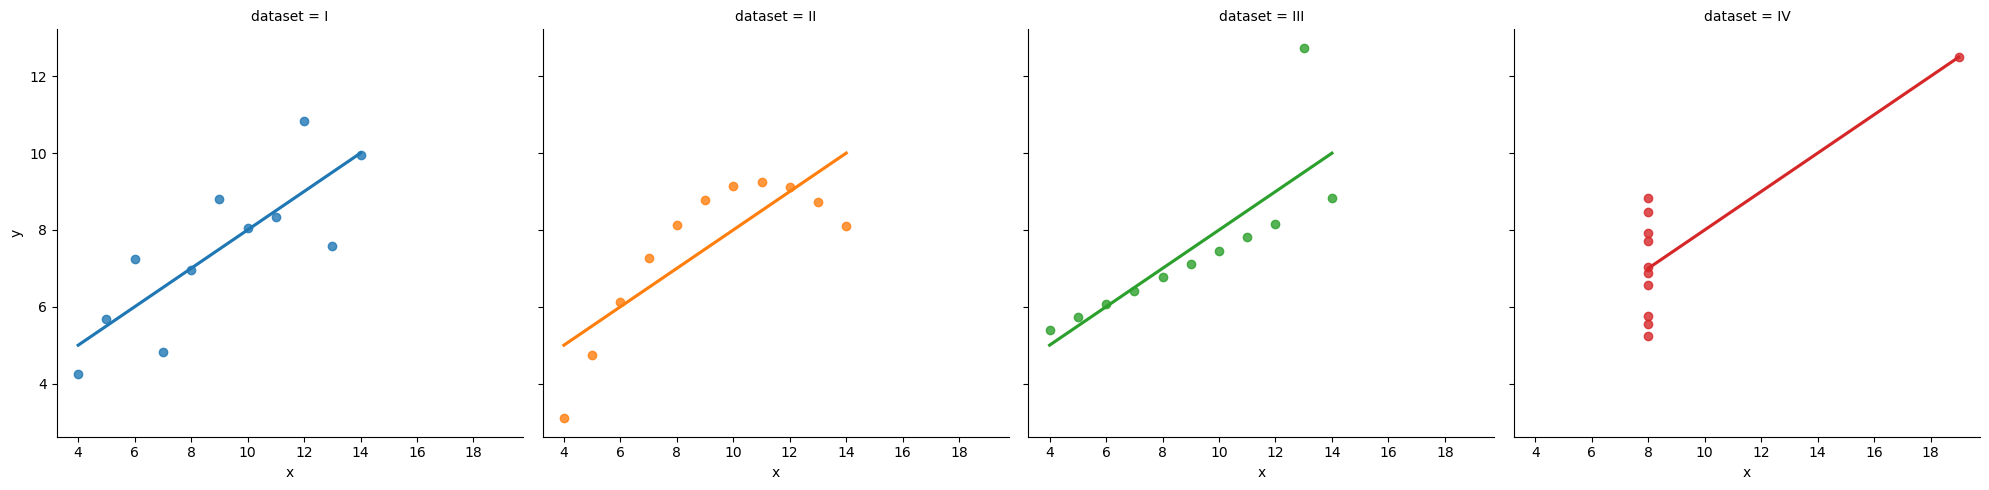

In [49]:
# Show the results of a linear regression within each dataset
sns.lmplot(x = "x", y = "y", 
           col = "dataset", 
           hue = "dataset", 
           data = anscombe,
           col_wrap = 4, ci = None);

- (I) is a good candidate for a linear regression model. 

- (II) implies a quadratic relationship between $x$ and $y$. Adding quadratic terms to the linear regression model can improve our predictions. 

- (III) implies an outlier is present. Accounting for the outlier can improve the performance of the model on a new dataset. 

- (IV) there is no variation in $x$. Typically regression will not be able to calculate the slope of $x$ (since $Var(x) = 0$), but a slope is estimated only because of the presence of an outlier. 

## Polynomial terms 

It may be that the effect of $x_k$ changes with the level of $x_k$. In other words, $\beta _k$ changes with the value of $x_k$. 

<img src='../images/beta.png' align=center, width=500>

Incorporating polynomial terms can account for this. 

**Example:** In `hprice2` dataset let's say we wanted to model house prices as a function of the number of rooms in a house. 

A dataframe with 506 observations on 12 variables:

- price: median housing price(usd)

- crime: crimes committed per capita

- nox: NO2 concentrations; parts per 100m

- rooms: avg number of rooms

- dist: wght dist to 5 employ centers

- radial: access. index to rad. hghwys

- proptax: property tax per 1000(usd)

- stratio: average student-teacher ratio

- lowstat: perc of people 'lower status'

- lprice: log(price)

- lnox: log(nox)

- lproptax: log(proptax)

In [50]:
hprice2 = pd.read_csv("../data/hprice2.csv")
hprice2.describe()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22511.509881,3.611536,5.549783,6.284051,3.795751,9.549407,40.823715,18.459289,12.701482,9.941057,1.693091,5.931405
std,9208.856171,8.590247,1.158395,0.702594,2.106137,8.707259,16.853711,2.165820,7.238066,0.409255,0.201410,0.396367
min,5000.000000,0.006000,3.850000,3.560000,1.130000,1.000000,18.700001,12.600000,1.730000,8.517193,1.348073,5.231109
25%,16850.000000,0.082000,4.490000,5.882500,2.100000,4.000000,27.900000,17.400000,6.922500,9.732093,1.501853,5.631212
50%,21200.000000,0.256500,5.380000,6.210000,3.210000,5.000000,33.000000,19.100000,11.360000,9.961757,1.682688,5.799093
75%,24999.000000,3.677000,6.240000,6.620000,5.187500,24.000000,66.599998,20.200001,17.057500,10.126591,1.830980,6.501290
max,50001.000000,88.975998,8.710000,8.780000,12.130000,24.000000,71.099998,22.000000,39.070000,10.819798,2.164472,6.566672


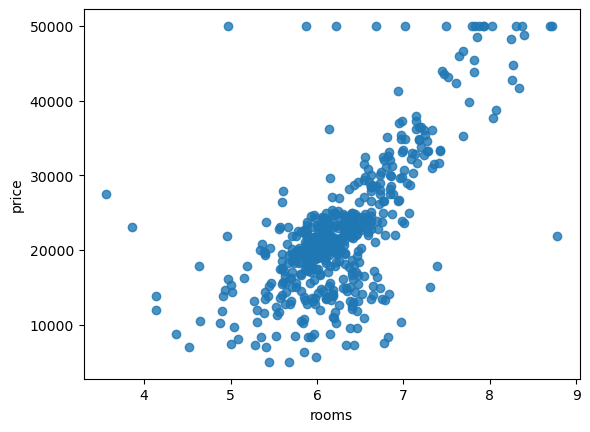

In [51]:
sns.regplot(x = "rooms", y = "price", 
            data = hprice2, 
            ci = False, 
            fit_reg = False);

By inspecting the scatterplot, we don't think that there's a clear linear trend in the data. It seems to be that house prices drop with the number of rooms, then rises. 

This somewhat resembles a **quadratic function**:

<AxesSubplot:>

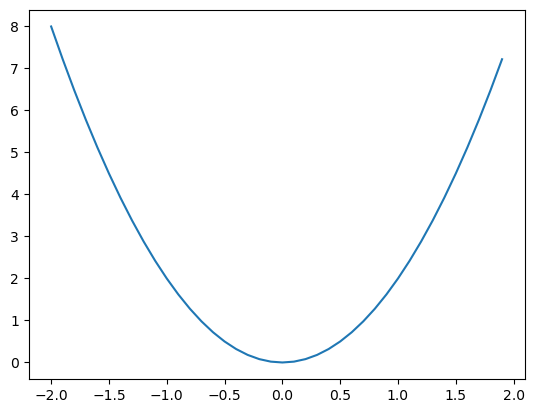

In [52]:
x = np.arange(-2, 2, step = .1)
y = 2 * x ** 2

sns.lineplot(x = x, y = y)

Instead of modelling `price` as linearly related to `rooms`, we could fit the following function: 

$$y = \beta _0 + \beta _1 x_1 + \beta _2 x_1^2 + \epsilon$$

which is still linear in parameters yet captures nonlinearity, and thus can be fitted using least squares. 

Polynomial terms have to be manually specified within the `I()` function. 

In [53]:
quad_mod = lm(formula = "price ~ rooms + I(rooms ** 2)", 
              data = hprice2)
quad_mod.params

Intercept        66203.177076
rooms           -22713.177712
I(rooms ** 2)     2477.094624
dtype: float64

We can compare the fit of the two models using the **root mean squared error** and find that the regression with polynomial features makes, on average, smaller mistakes in prediction:

In [54]:
from statsmodels.tools.eval_measures import rmse

In [55]:
linear_mod = lm(formula = "price ~ rooms", 
                data = hprice2)
linear_mod.params

Intercept   -34796.200147
rooms         9119.548290
dtype: float64

In [56]:
rmse(quad_mod.predict(), hprice2.price)

6177.072379628398

In [57]:
rmse(linear_mod.predict(), hprice2.price)

6607.767667481312

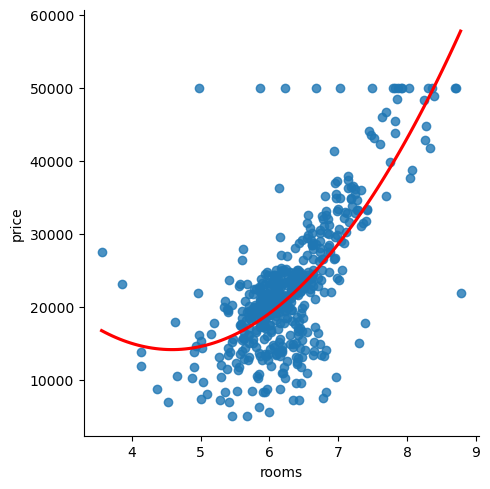

In [58]:
sns.lmplot(x = "rooms", y = "price", 
           data = hprice2, line_kws={"color": 'red'},
           order = 2, 
           ci = False)

### Overfitting and higher order polynomial terms 

Adding complexity to your model e.g. adding higher-order polynomial terms might improve the performance of your model in the sample you fit your model on, but your model may not generalise. In other words, you may end up [overfitting](https://stats.stackexchange.com/questions/128616/whats-a-real-world-example-of-overfitting) your data. 

> **overfitting**: when you have a complicated statistical procedure that gives worse predictions, on average, than a simpler procedure. ([source](https://statmodeling.stat.columbia.edu/2017/07/15/what-is-overfitting-exactly/))

![](../images/overfitting.png)

Consider the diagram on the right. Fitting a higher order polynomial to the data will almost guarantee a perfect fit to the data, but may not generalise well to a new dataset. Because the model fits well, the model is regarded as 'low bias', but the 'variance' of the model is high. In fact, given a high enough polynomial order, it is possible to fit the data perfectly (see [here](https://people.cs.pitt.edu/~milos/courses/cs2750-Spring03/lectures/class1.pdf) for details), but this tells us nothing about how the model will perform on unseen data. The model ends up 'memorizing' the training data. 

On the other hand, consider the diagram on the left. Fitting a linear model to the model is not ideal, because it does not capture the nonlinearity in the data. In other words, the model has higher bias. However, it has low variance, because the model has lower complexity. 

Ideally, you want a model that is akin to the diagram in the middle, where the model is just complex enough to capture the phenomenon of interest.

These diagrams illustrate the **bias-variance tradeoff** - the tradeoff between complexity and generalisability. 

Another reason to use lower order polynomials is **Occam's Razor** - the philosphical principle that simpler models are preferred to more complex models.

In [59]:
mtcars.shape

(32, 11)

(0.0, 600.0)

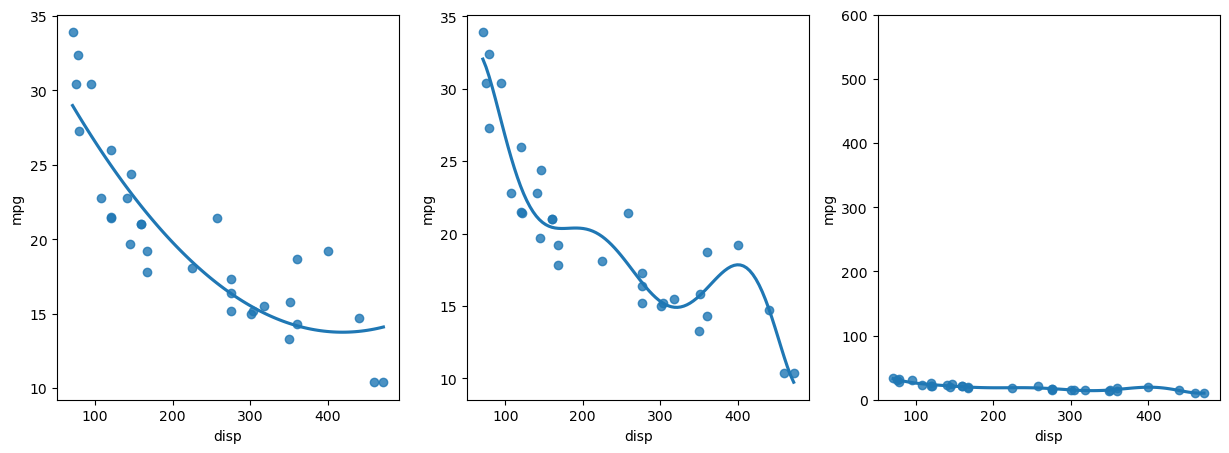

In [60]:
fg, ax = plt.subplots(ncols = 3, figsize = (15,5))

i = 0 
for order in [2, 7, 10]: 
    sns.regplot(y = "mpg", x = "disp", 
                data = mtcars, 
                order = order, 
                ci = False, 
                ax = ax[i])
    i += 1
plt.ylim(0, 600)

#### Overfitted models may not generalise

To show that overfitted models may not generalise, let us simply split our data into two sets - a training and a test set. 

In [61]:
train = hprice2.sample(frac = .75, random_state=42)
test = hprice2.drop(train.index)

How well the model performs on the test data would give us some indication of how the model will perform on new data. 

In [62]:
mod2 = lm(formula = "price ~ rooms + I(rooms ** 2)", 
          data = train)

mod3 = lm(formula = "price ~ rooms + I(rooms ** 2) + I(rooms ** 3)", 
          data = train)

mod4 = lm(formula = "price ~ rooms + I(rooms ** 2) + I(rooms ** 3) + I(rooms ** 4)", 
          data = train)

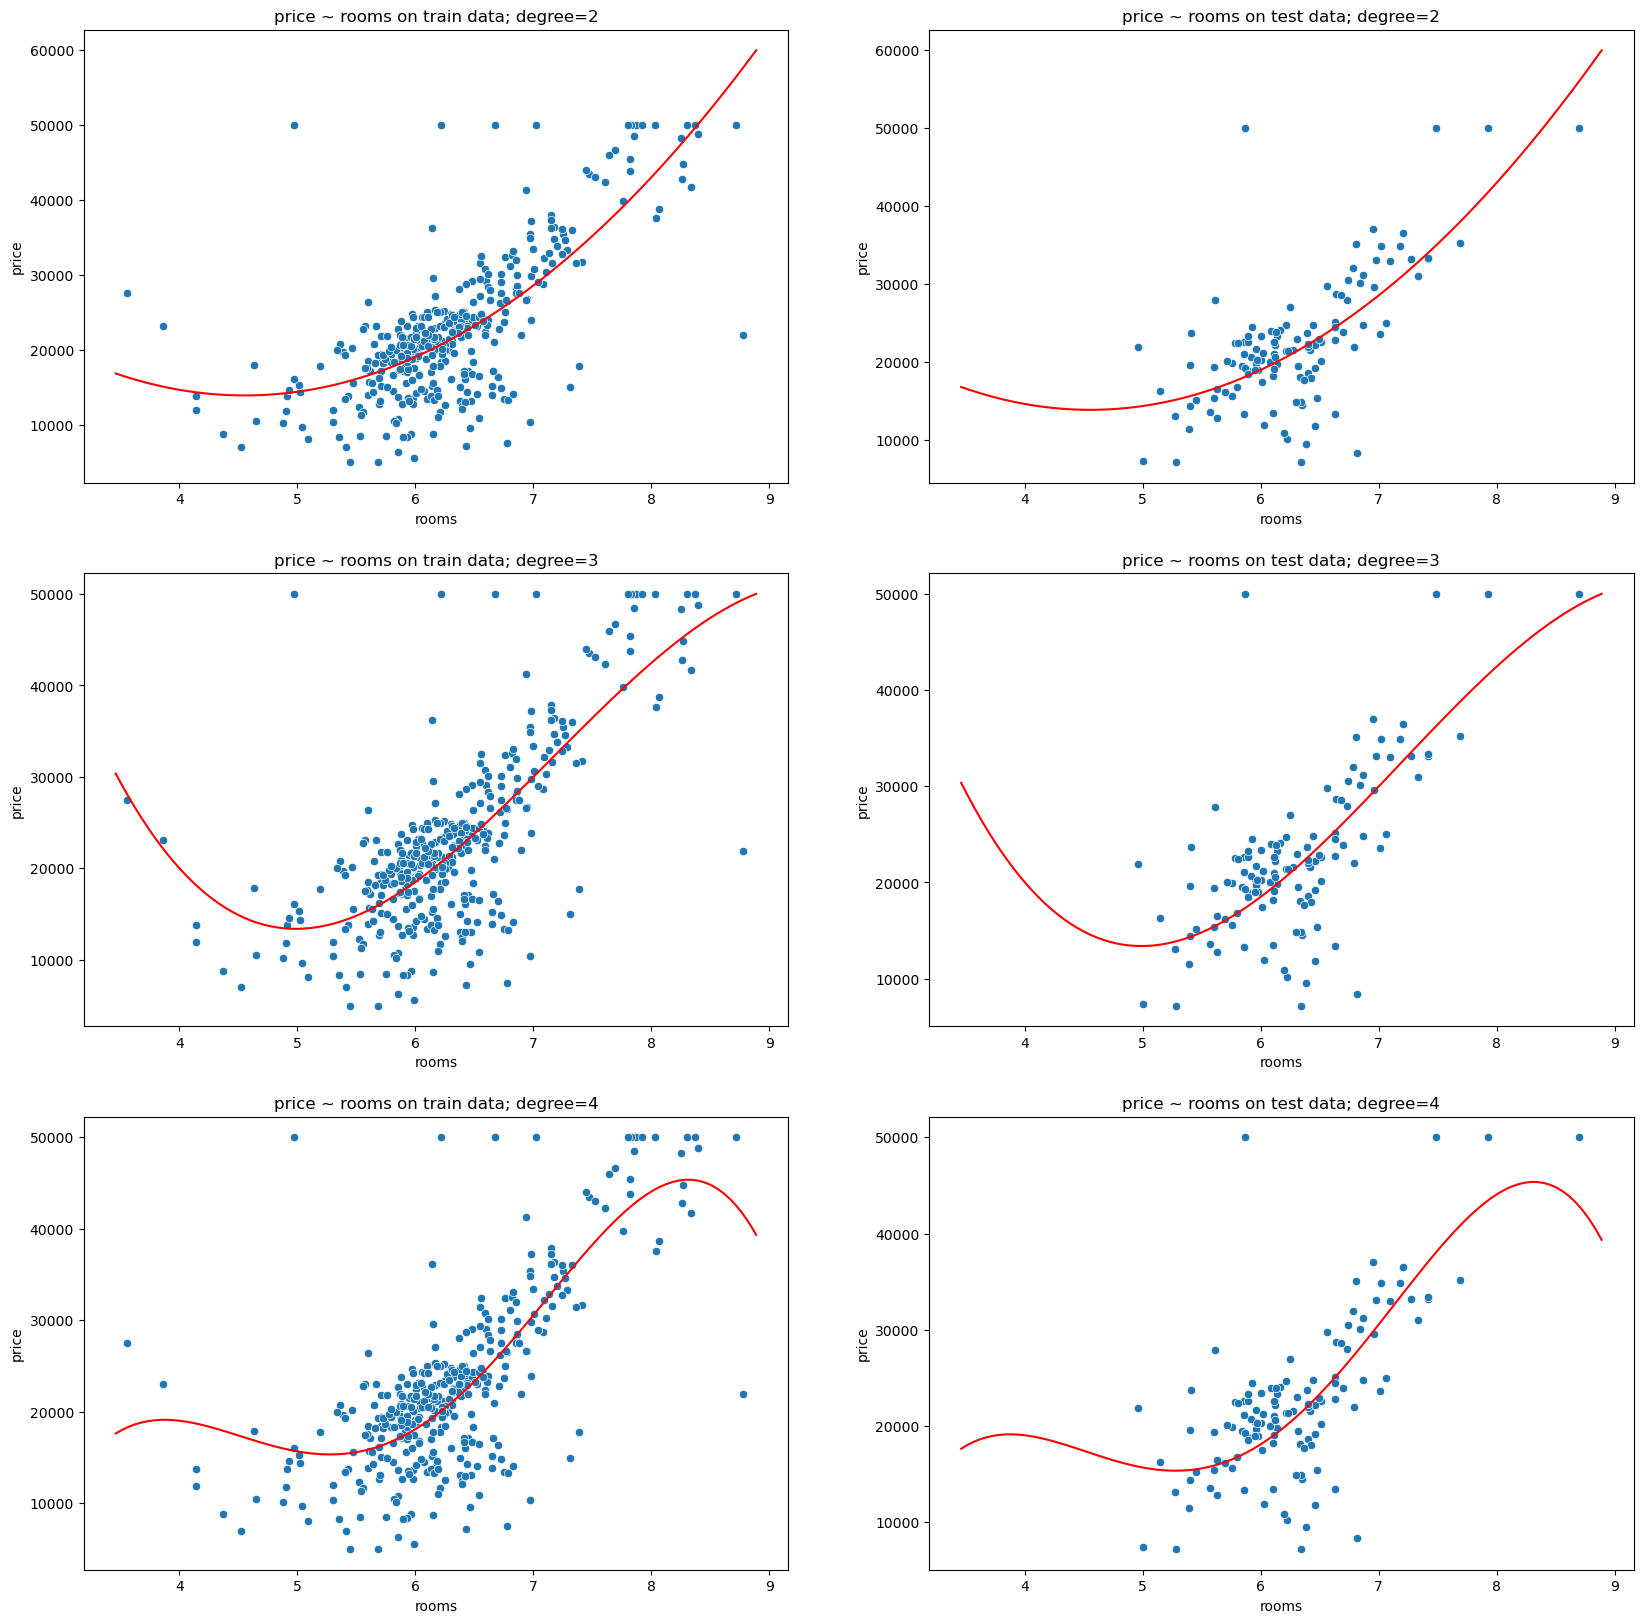

In [63]:
x_Min = min(hprice2.rooms)
x_Max = max(hprice2.rooms)
xx = pd.DataFrame({'rooms':np.linspace(x_Min-0.1,x_Max+.11, 100 )})

mods=[mod2, mod3, mod4]

fg, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(20,20))

i = 0 
for model in mods: 
    sns.scatterplot(y = "price", x = "rooms", data = train, ax = ax[i,0]).\
           set_title(f'price ~ rooms on train data; degree={int(model.df_model)}')
    ax[i,0].plot(xx.rooms, model.predict(exog=xx.rooms), c='red') 
    
    sns.scatterplot(y = "price", x = "rooms", data = test, ax = ax[i,1]).\
           set_title(f'price ~ rooms on test data; degree={int(model.df_model)}')
    ax[i,1].plot(xx.rooms, model.predict(exog=xx.rooms), c='red')
    i += 1

In [64]:
# in-sample error decreases with quadratic order ... 
rmse(mod2.predict(), train.price), \
rmse(mod3.predict(), train.price), \
rmse(mod4.predict(), train.price)

(6301.734523585271, 6161.307320227947, 6063.01585333554)

In [65]:
# but rises out-of-sample - the model does not generalise as well to a new dataset
rmse(mod2.predict(exog = test), test.price), \
rmse(mod3.predict(exog = test), test.price), \
rmse(mod4.predict(exog = test), test.price)

(5787.833981367456, 5886.052696238962, 5859.1590071092105)

As you can see, the value of root mean squared error on train set decreases as the degree of the polynomial increases however it is not the case on test set and you see the values of root mean squared error for degrees 3 and 4 are higher than that for degree 2.

### Other causes of overfitting
1. **Too many predictors**. 
2. **Too few observations**.

These two issues are really both sides of the same coin. 

Take for instance the following diagram. There clearly isn't enough variability in our sample to detect patterns in the data. 


In the extreme case, your model ends up fitting a model specifically for one data point. 
More examples are available [here](https://stats.stackexchange.com/questions/128616/whats-a-real-world-example-of-overfitting).

In [66]:
# fit polynomial model which fits in a range of one predictor where data is sparse

<AxesSubplot:>

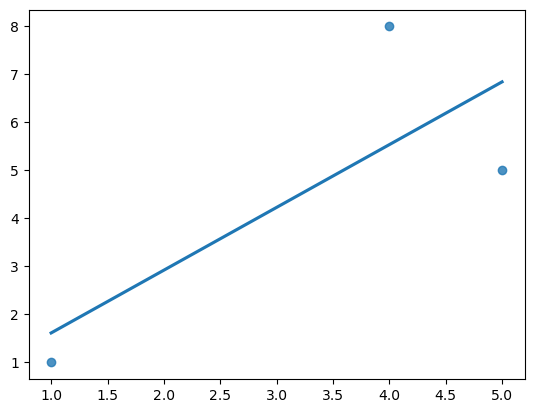

In [67]:
sns.regplot(x = [1, 5, 4], y = [1, 5, 8], 
            ci = False)

Sometimes there's scientific reasons for picking polynomial order. We assume this is the case for now. 

If there isn't, we have to look at the residual diagnostics to tell us when higher order polynomials are required. This will be discussed on day 2. 

## Interaction terms 

How about if the effect of one variable changes with the level of another variable? To capture **interaction effects**, we can use a model such as the following: 

$$y = \beta _0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$$

Here, a unit increase in $x_1$ is associated with a $\beta_1 + \beta_3 x_2$ increase in $y$. This makes clear that as $x_2$ increases, the effect of $x_1$ on $y$ increases. 

In [68]:
hprice2.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.600000,15.300000,4.98,10.085809,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.200001,17.799999,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.200001,17.799999,4.03,10.454495,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.200001,18.700001,2.94,10.416311,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.200001,18.700001,5.33,10.496787,1.521699,5.402678


**Example:**

1. In `hprice2` data set predict `price` using `rooms` and `dist`. Compare the performance on train and test.
2. Add polynomials and interaction terms for degrees 2 and 3.Compare the performance on train and test.

In [69]:
h_mod1 = lm(formula = "price ~ rooms + dist", 
          data = train)

h_mod2 = lm(formula = "price ~ rooms + dist + I(rooms ** 2) + rooms * dist + I(dist ** 2)", 
          data = train)

h_mod3 = lm(formula = "price ~ rooms + dist + I(rooms ** 2) + rooms * dist + \
                    I(rooms ** 2) * dist + rooms * I(dist ** 2) + I(rooms ** 3)", 
          data = train)

In [70]:
rmse(h_mod1.predict(), train.price), \
rmse(h_mod2.predict(), train.price), \
rmse(h_mod3.predict(), train.price)

(6701.439971029806, 5937.099449512272, 5813.22619734754)

In [71]:
rmse(h_mod1.predict(exog = test), test.price), \
rmse(h_mod2.predict(exog = test), test.price), \
rmse(h_mod3.predict(exog = test), test.price)

(5991.992596419688, 5616.256792286533, 5781.013397814984)

In [72]:
h_mod2.params

Intercept        81669.741312
rooms           -27536.678361
dist              -240.971439
I(rooms ** 2)     2662.207278
rooms:dist         524.151520
I(dist ** 2)      -231.949855
dtype: float64

Equation: y = 81669.74 + -27536.68rooms + -240.97dist + 2662.21rooms^2 +524.15rooms x dist + -231.95disp^2 


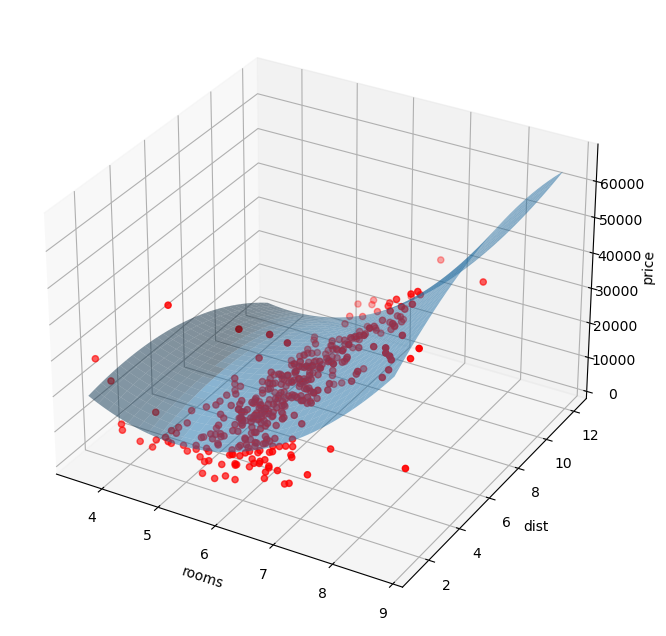

In [73]:
# create arrays for the data points
X = train[['rooms', 'dist']]
Y = train['price']


# graph the data
fig = plt.figure(1, figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], Y, color = 'red')
ax.set_xlabel('rooms')
ax.set_ylabel('dist')
ax.set_zlabel('price')

# Use Linear Algebra to solve

coefs = h_mod2.params

room_s = np.tile(np.linspace(min(X.iloc[:, 0]), max(X.iloc[:, 0]),61), (61,1))
dist_s = np.tile(np.linspace(min(X.iloc[:, 1]), max(X.iloc[:, 1]),61), (61,1)).T

price_s = coefs[0] + room_s*coefs[1]+dist_s*coefs[2]+\
     (room_s**2)*coefs[3]+room_s*dist_s*coefs[4]+(dist_s**2)*coefs[5]
print("Equation: y = {:.2f} + {:.2f}rooms + {:.2f}dist + {:.2f}rooms^2 +{:.2f}rooms x dist + {:.2f}disp^2 ".format(coefs[0], coefs[1],coefs[2],
                                                    coefs[3], coefs[4],coefs[5]))
ax.plot_surface(room_s,dist_s,price_s, alpha=0.5)
#ax.view_init(0, 0)
plt.show()

**Exercise**: 

Consider the following model adapted from Wooldridge, which explains final exam scores, `stndfnl` by prior GPA, `priGPA` and attendance, `atndrte`. 

1. Predict `stndfnl` using `priGPA` and  `atndrte`. Compare the performance on train and test.

2. Suppose we knew that the effect of attending more classes is higher for students with higher GPA. Therefore, there should be interaction effect between `priGPA` and  `atndrte`. Predict `stndfnl` using `priGPA`,  `atndrte`, and their interaction. Compare the performance on train and test.

In [74]:
attend = pd.read_csv("../data/attend.csv")
a_train = attend.sample(frac = .75, random_state=42)
a_test = attend.drop(a_train.index)

In [75]:
# Your code here

In [76]:
def interaction_model(priGPA, atndrte):
    return a_mod2.params[0] + priGPA * a_mod2.params[1] + atndrte * a_mod2.params[2] + priGPA * atndrte * a_mod2.params[3]

Suppose we want to find the change in predicted `stndfnl` when `atndrte` changes from 3 to 4 at priGPA = 5: 

In [77]:
interaction_model(priGPA = 5, atndrte = 4) - interaction_model(priGPA = 5, atndrte = 3)


NameError: name 'a_mod2' is not defined

For `priGPA` = 6, the change in predicted `stndfnl` when `atndrte` changes from 3 to 4 is in fact greater: 

In [ ]:
interaction_model(6, 4) - interaction_model(6, 3)


The effect of `atndrte` on `stndfnl` increases with `priGPA` since there is a positive weight on the interaction term. 

### Interpreting polynomial transformations 

$$y = \beta _0 + \beta _1 x_1 + \beta _2 x_1^2 + \epsilon$$


A unit increase in $x_1$ is associated with a $\beta_1 + 2\beta _2x_1$ increase in $y$. To see this, take the derivative of $y$ with respect to $x_1$. This expression makes it clear that as $x_1$ increases, the effect of $x_1$ on $y$ increases/decreases, depending on the sign of $\beta _2$. 

### Interpreting interaction terms

Recall that for the interaction model $$y = \beta _0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$$

a unit increase in $x_1$ is associated with a $\beta_1 + \beta_3 x_2$ increase in $y$. This makes clear that as $x_2$ increases, the effect of $x_1$ on $y$ increases. 

In [ ]:
mod = lm(formula = "stndfnl ~ priGPA * atndrte", 
         data = attend)
mod.params

**Exercise:**

In `house_prices` dataset, estimate `selling_price` using: 
    - `area` and one polynomial term
    - `area` and `living_space_size`
    - interaction of `area` and `living_space_size`

Compare the models using the root mean squared error. 

In [ ]:
house_prices = pd.read_csv("../data/house_prices.csv")
house_prices.describe()


In [ ]:
def fit_reg(formula): 
    mod = lm(formula = formula, data = house_prices)
    return rmse(mod.predict(), house_prices.selling_price)


In [ ]:
# Your code here

**Exercise:**

Estimate `mpg` based on the displacement (`disp`), and automatic/manual transmition (`am`).

In [ ]:
# Your code here

- **Attention:** Note that `am` takes values 0 or 1. Holding `disp` constant, automatic cars have 1.8334 higher `mpg` compared to manual cars

In [ ]:
x = np.linspace(-1, max(mtcars.disp)+10, 100)
sns.scatterplot(x = "disp", y = "mpg", data = mtcars, hue='am')
line_am0 = car_mod3.params[0] + car_mod3.params[1] * x
line_am1 = car_mod3.params[0] + car_mod3.params[1] * x + car_mod3.params[2]
plt.plot(x, line_am0, color = 'blue', label = 'am = 0'  )
plt.plot(x, line_am1, color = 'orange', label = 'am = 1'  )
plt.axis(xmin=0)
plt.legend()

## Categorical predictors

So far, all of our predictors have been numeric. What if one of our predictors was categorical?

Categorical predictors cannot be used in the regression equation just as they are. We need to transform them into dummy variables. 

### Dummy variables

We need to represent all data numerically. If a predictor only has two categories, we can simply create a dummy variable that represents the categories as a binary value:

<img src='../images/Dummy1.png'>

<img src='../images/Dummy2.png'>

To create columns of dummy variables in our data frame, we can use `pd.get_dummies()`. Adding the `drop_first = True` argument adds $k-1$ columns to the DataFrame for a variable with $k$ categories. 

### Dummy variables and the intercept

Dummy variables shift the regression line upwards or downwards, depending on the direction of the estimate. 

In [ ]:
mtcars_dummied = pd.get_dummies(mtcars, columns = ["am"], drop_first = True)
mtcars_dummied.head()




In [ ]:
mod = lm(formula = "mpg ~ disp + am_1", data = mtcars_dummied)
mod.summary()

Alternately, use the `C()` operator in formula syntax: 

In [ ]:
mod = lm(formula = "mpg ~ disp + C(am)", data = mtcars)
mod.summary()

### Exercise
For `iris` data set, create a regression model that predicts `Sepal.Length` based on all the data.

In [ ]:
iris = sm.datasets.get_rdataset("iris").data
iris.info()

In [ ]:
iris.columns = map(lambda x: x.replace(".","_"), iris.columns)
iris.info()


In [ ]:
iris.Species.unique()

In [ ]:
# Your code here

In [ ]:
# verisicolor;   SW=0.2, PL=0.1, PW=0.05
mod.params.Intercept+mod.params[1]+mod.params[3] *0.2+mod.params[4]*0.1+mod.params[5]*0.05

In [ ]:
# virginica;   SW=0.2, PL=0.1, PW=0.05
mod.params.Intercept+mod.params[2]+mod.params[3] *0.2+mod.params[4]*0.1+mod.params[5]*0.05

In [ ]:
# setosa;   SW=0.2, PL=0.1, PW=0.05
mod.params.Intercept+mod.params[3] *0.2+mod.params[4]*0.1+mod.params[5]*0.05

In [ ]:
# Alternative way of handling columns with dot in their names
# mod = lm(formula = "Q('Sepal.Length') ~ Q('Sepal.Width') + Q('Petal.Length') + Q('Petal.Width') + C(Species)", data = iris)
# mod.summary()

### Interaction terms with dummies: Numerical * Categorical

If we believe that a variable may have different effects on the outcome depending on which group it belongs to, use an interaction term: 

In [ ]:
mod = lm(formula = "mpg ~ disp * C(am)", 
         data = mtcars)
mod.params

In [ ]:
# am=1:    mpg_hat=25.157064 + 7.709073*1 + (-0.027584)*disp + (-0.031455)*disp*1
# am=0:    mpg_hat=25.157064  + (-0.027584)*disp 

This is equivalent to running two regressions on two subsets of the data:

In [ ]:
mod1 = lm(formula = "mpg ~ disp * C(am)", 
         data = mtcars[mtcars.am == 0])
mod1.params

In [ ]:
mod2 = lm(formula = "mpg ~ disp * C(am)", 
         data = mtcars[mtcars.am == 1])
mod2.params

In [ ]:
sns.lmplot(x = "disp", y = "mpg",   
           hue = "am", 
           data = mtcars, 
           ci = False)

### Interaction terms with dummies: Categorical * Categorical

Consider the dataset `ToothGrowth`, with three variables:
- len: tooth length
- supp: supplement
- dose: dosage size

In [ ]:
ToothGrowth.head()

In [ ]:
ToothGrowth.info()

In [ ]:
plt.scatter(ToothGrowth.dose,ToothGrowth.len);

Although the column `dose` is numerical but it takes only three values `[0.5, 1, 2]` and we can consider that as categorical variable.

In [ ]:
ToothGrowth[["supp", "dose"]].drop_duplicates()

Run a regression interacting the two predictors `supp` and `dose` to predict `len`: 

In [ ]:
mod = lm(formula = "len ~ C(supp) * C(dose)", 
         data = ToothGrowth)
mod.params

In [ ]:
mod.summary()

In [ ]:
ToothGrowth.groupby(["supp", "dose"]).mean()

### Exercise 

1. From the above regression output, find the average tooth length, `len` for
    - supp = OJ, dose = 0.5
    - supp = OJ, dose = 1.0
    - supp = OJ, dose = 2.0
    - supp = VC, dose = 0.5
    - supp = VC, dose = 1.0
    - supp = VC, dose = 2.0

Check your answers below. 

In [ ]:
# Your code here


In [ ]:
sns.lmplot(x = 'dose', y = 'len', row = 'supp', col='dose', data = ToothGrowth, ci = False)

## Perfect vs. imperfect collinearity 

**Perfect collinearity** occurs if two or more of your predictors are perfectly correlated. If this happens, `lm()` will not be able to compute coefficients correctly. An example of perfect collinearity is including the same predictor as two separate predictors on different scales (e.g. km vs. m). To fix this, just drop one of the collinear variables. 

**Imperfect collinearity** occurs when two or more of your predictors are highly correlated. If this happens, the regression will still compute. However, least-squares regression may have trouble disentangling individual effects of the correlated predictors. 

**Example:**

In [ ]:
df = pd.DataFrame({'x1':np.linspace(0,1,30), 'x2':1.55*np.linspace(0,1,30), 
               'noise':np.random.normal(0,1,30)} )
df['y'] = 7*df['x1'] + df['noise'] 
df.head()

In [ ]:
sns.pairplot(df);

In [ ]:
mod_c = lm(formula = "y ~ x1 ", data = df)
mod_c.summary()

In [ ]:
import random
random.seed(10)

mod_c = lm(formula = "y ~ x1 + x2 ",data = df)
mod_c.summary()

### Exercise
For `insurance` data set, we need to predict `charges`. 
1. First visualize the relationship between all the two-by-two combinations of the variables. <br>
    a) Which independent variables have relationship with the target variable? <br>
    b) Which independent variables have relationship together?

2. Create a regression model that predicts `charges` based on all the data. 

3. Add interaction terms if it is needed.

In [ ]:
insurance = pd.read_csv('../data/insurance.csv')
insurance.head()

In [ ]:
insurance.info()

In [ ]:
insurance.describe()

In [ ]:
# Your code here

# Reference

- Linear Regression & Inference Rules (Video): https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/intro-inference-slope


- The Complete Guide to Linear Regression in Python: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8


- Model Selection: https://machinelearningmastery.com/probabilistic-model-selection-measures/